# Закономерности, определяющие успешность игры

На рассмотрении интернет-магазин «Стримчик», который продаёт по всему миру компьютерные игры. Из открытых источников доступны исторические данные о продажах игр, оценки пользователей и экспертов, жанры и платформы (например, Xbox или PlayStation). Задача состоит в выявлении определяющих успешность игры закономерностей. Это позволит сделать ставку на потенциально популярный продукт и спланировать рекламные кампании. Предоставлены данные до 2016 года.
В наборе данных попадается аббревиатура ESRB (Entertainment Software Rating Board) — это ассоциация, определяющая возрастной рейтинг компьютерных игр. ESRB оценивает игровой контент и присваивает ему подходящую возрастную категорию, например, «Для взрослых», «Для детей младшего возраста» или «Для подростков».

**План проекта**

1. Введение, изучение общей информации.
2. Предобрабокта данных:
- [x]  заменить названия столбцов (приведите к нижнему регистру);
- [x]  преобразовать данные в нужные типы, описать причину замены;
- [x]  обработать пропуски при необходимости, объяснить, почему пропуски заполнены определённым образом или вовсе не заполнены, описать причины, которые могли привести к пропускам.
- [x]  изучить значение 'tbd' в столбце `User_Score`, описать, как его обработать;
- [x]  посчитать суммарные продажи во всех регионах и запишите их в отдельный столбец.
3. Исследовательский анализ данных:
- [x]  посмотреть, сколько игр выпускалось в разные годы. Важны ли данные за все периоды?
- [x]  посмотреть, как менялись продажи по платформам. Выбрать платформы с наибольшими суммарными продажами и построить распределение по годам. За какой характерный срок появляются новые и исчезают старые платформы?
- [x]  взять данные за соответствующий актуальный период. Актуальный период определить в результате исследования предыдущих вопросов. Основной фактор — эти данные помогут построить прогноз на 2017 год. Не учитывать в работе данные за предыдущие годы.
- [x]  какие платформы лидируют по продажам, растут или падают? Выбрать несколько потенциально прибыльных платформ.
- [x]  построить график «ящик с усами» по глобальным продажам игр в разбивке по платформам, описать результат.
- [x]  посмотреть, как влияют на продажи внутри одной популярной платформы отзывы пользователей и критиков, построить диаграмму рассеяния и посчитать корреляцию между отзывами и продажами, сформулировать выводы.
- [x]  соотнести выводы с продажами игр на других платформах.
- [x]  посмотреть на общее распределение игр по жанрам. Что можно сказать о самых прибыльных жанрах? Выделяются ли жанры с высокими и низкими продажами?
4. Составление портрета пользователя каждого региона:
Определить для пользователя каждого региона (NA, EU, JP):
- [x]  самые популярные платформы (топ-5), описать различия в долях продаж.
- [x]  самые популярные жанры (топ-5), объяснить разницу.
- [x]  влияет ли рейтинг ESRB на продажи в отдельном регионе?
5. Статистический анализ: 
Проверить гипотезы
- [x]  средние пользовательские рейтинги платформ Xbox One и PC одинаковые;
- [x]  средние пользовательские рейтинги жанров Action и Sports разные.
- [x]  задать пороговое значение alpha, объяснить формулировку нулевой и альтернативной гипотезы, какой критерий был применен для проверки гипотез и почему.
6. Общий вывод

### Введение, общая информация

В этом разделе изучим основную информацию датасета.

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from scipy import stats as st
from bs4 import BeautifulSoup
import requests

In [2]:
data = pd.read_csv('C:/Users/borod/OneDrive/Рабочий стол/DS/project4(games)/games.csv')
#data = pd.read_csv('/datasets/games.csv') 
data.head(10)

,Name,Platform,Year_of_Release,Genre,NA_sales,EU_sales,JP_sales,Other_sales,Critic_Score,User_Score,Rating
0,Wii Sports,Wii,2006.0,Sports,41.36,28.96,3.77,8.45,76.0,8,E
1,Super Mario Bros.,NES,1985.0,Platform,29.08,3.58,6.81,0.77,NaN,NaN,NaN
2,Mario Kart Wii,Wii,2008.0,Racing,15.68,12.76,3.79,3.29,82.0,8.3,E
3,Wii Sports Resort,Wii,2009.0,Sports,15.61,10.93,3.28,2.95,80.0,8,E
4,Pokemon Red/Pokemon Blue,GB,1996.0,Role-Playing,11.27,8.89,10.22,1.00,NaN,NaN,NaN
5,Tetris,GB,1989.0,Puzzle,23.20,2.26,4.22,0.58,NaN,NaN,NaN
6,New Super Mario Bros.,DS,2006.0,Platform,11.28,9.14,6.50,2.88,89.0,8.5,E
7,Wii Play,Wii,2006.0,Misc,13.96,9.18,2.93,2.84,58.0,6.6,E
8,New Super Mario Bros. Wii,Wii,2009.0,Platform,14.44,6.94,4.70,2.24,87.0,8.4,E
9,Duck Hunt,NES,1984.0,Shooter,26.93,0.63,0.28,0.47,NaN,NaN,NaN


In [3]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16715 entries, 0 to 16714
Data columns (total 11 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   Name             16713 non-null  object 
 1   Platform         16715 non-null  object 
 2   Year_of_Release  16446 non-null  float64
 3   Genre            16713 non-null  object 
 4   NA_sales         16715 non-null  float64
 5   EU_sales         16715 non-null  float64
 6   JP_sales         16715 non-null  float64
 7   Other_sales      16715 non-null  float64
 8   Critic_Score     8137 non-null   float64
 9   User_Score       10014 non-null  object 
 10  Rating           9949 non-null   object 
dtypes: float64(6), object(5)
memory usage: 1.4+ MB


Итак, датафрейм состоит из 16715 строк и 11 столбцов, причем в 6 из 11 наблюдаются пропуски, с которыми мы разберемся позже. 
- `Name` — название игры
- `Platform` — платформа
- `Year_of_Release` — год выпуска
- `Genre` — жанр игры
- `NA_sales` — продажи в Северной Америке (миллионы проданных копий)
- `EU_sales` — продажи в Европе (миллионы проданных копий)
- `JP_sales` — продажи в Японии (миллионы проданных копий)
- `Other_sales` — продажи в других странах (миллионы проданных копий)
- `Critic_Score` — оценка критиков (максимум 100)
- `User_Score` — оценка пользователей (максимум 10)
- `Rating` — рейтинг от организации ESRB. Здесь «EC» — «Для детей младшего возраста», «E» — «Для всех», «E10+» — «Для всех от 10 лет и старше», «T» — «Подросткам», «M» — «Для взрослых», «AO» — «Только для взрослых», «RP» — «Рейтинг ожидается», «K-A» - не понятно, что означает, в интернете нет такой категории. "K-A" - это настоящий рейтинг "E", изменим позже.

### Предобработка данных

Приведем к нижнему регистру названия всех столбцов.

In [4]:
data.columns = data.columns.str.lower()
data.columns

Index(['name', 'platform', 'year_of_release', 'genre', 'na_sales', 'eu_sales',
       'jp_sales', 'other_sales', 'critic_score', 'user_score', 'rating'],
      dtype='object')

Явных дубликатов не оказалось. Ура!

In [5]:
data.duplicated().sum()

0

In [6]:
data.isna().sum()

name                  2
platform              0
year_of_release     269
genre                 2
na_sales              0
eu_sales              0
jp_sales              0
other_sales           0
critic_score       8578
user_score         6701
rating             6766
dtype: int64

Пропуски наблюдаются в 6 столбцах. Причем строки без имени и жанра можно удалить, поскольку они не представляют ценности для всего датафрейма. Кстати, строки без имени и жанра совпадают.

В остальных 4-х столбцах количество пропусков достаточно велико(кроме `year_of_release`), поэтому просто удалить их не получится, нужно будет заменять в соответствии с выбранным принципом. 

In [7]:
data[data['name'].isnull()]

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating
659,NaN,GEN,1993.0,NaN,1.78,0.53,0.00,0.08,NaN,NaN,NaN
14244,NaN,GEN,1993.0,NaN,0.00,0.00,0.03,0.00,NaN,NaN,NaN


In [8]:
data[data['genre'].isnull()]

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating
659,NaN,GEN,1993.0,NaN,1.78,0.53,0.00,0.08,NaN,NaN,NaN
14244,NaN,GEN,1993.0,NaN,0.00,0.00,0.03,0.00,NaN,NaN,NaN


In [9]:
data = data.dropna(subset=['name'])

Приведем все имена к нижнему регистру и посмотрим количество дубликатов в этом случае. Вдруг одинаковые имена были записаны по-разному.

In [10]:
data['name'] = data['name'].str.lower()
data.duplicated().sum()

0

Нет, таких дубликатов не оказалось.

Разберемся с пропусками в `year_of_release`. Проведем парсинг сайта ag.ru. Будем искать название игры и извлекать год выпуска. Те названия, которые не нашлись(например, на сайте у игры не такое название или её вовсе там нет) просто удалим, они составляют незначительную часть всего датафрейма (меньше процента). Приведем к специальному виду имена для удобства парсинга. Используется *BeautifulSoup*, *requests*. Не судите строго! Первый раз писала парсинг =)

In [11]:
data.columns = data.columns.str.lower()
data['name'] = data['name'].astype('string').str.lower()
data['name'] = data['name'].str.replace(' ','-')

In [12]:
def year_na(name,year):
    try:
        if pd.isna(year):
            url = f'https://ag.ru/games/{name}'
            response = requests.get(url)
            bs = BeautifulSoup(response.text,"lxml")
            temp = bs.find('div', {'itemprop':'datePublished'})
            var = str(temp).split(' ')[5]
            return var
        else:
            return year
    except:
        return year

In [13]:
data['year_of_release'] = data.apply(lambda x: year_na(x['name'],x['year_of_release']), axis=1)

Остальные строки без года удалим, они составляют всего 1.5% от общего количества, поэтому их удаление будет не критично.

In [14]:
data = data.dropna(subset = ['year_of_release'])
data['year_of_release'] = data['year_of_release'].astype('float')
data['year_of_release'] = data['year_of_release'].astype('int64')
data['year_of_release'].sort_values().unique()

array([1977, 1980, 1981, 1982, 1983, 1984, 1985, 1986, 1987, 1988, 1989,
       1990, 1991, 1992, 1993, 1994, 1995, 1996, 1997, 1998, 1999, 2000,
       2001, 2002, 2003, 2004, 2005, 2006, 2007, 2008, 2009, 2010, 2011,
       2012, 2013, 2014, 2015, 2016, 2017, 2022], dtype=int64)

Приступим к заполнению пропусков в столбцах `critic_score`,	`user_score` - оценки со стороны критиков и пользователей соответственно. В этих столбцах достаточное количество пропусков, поэтому просто удалить их будет неправильным. Начнем с `user_score`, в этом столбце присутствует значение *tbd*, что означает "to be discussed" - будет определено позже. Будем это расценивать как NaN, можно заменить *tbd*->*NaN* без удаления этих строк, они нам еще понадобятся для дальнейшего анализа. 

Пропуски в обоих столбцах будем заполнять средним значением по жанру. Если заполнять по платформам, то возникнут проблемы с некоторыми из них, например GB,NES, поскольку у них вообще нет оценок.  

In [15]:
#data['user_score'] = data['user_score'].replace('tbd', np.NaN)
#data['user_score'] = data['user_score'].astype('float64')
data['user_score'] = pd.to_numeric(data['user_score'], errors='coerce')

In [16]:
data['user_score'].unique()

array([8. , nan, 8.3, 8.5, 6.6, 8.4, 8.6, 7.7, 6.3, 7.4, 8.2, 9. , 7.9,
       8.1, 8.7, 7.1, 3.4, 5.3, 4.8, 3.2, 8.9, 6.4, 7.8, 7.5, 2.6, 7.2,
       9.2, 7. , 7.3, 4.3, 7.6, 5.7, 5. , 9.1, 6.5, 8.8, 6.9, 9.4, 6.8,
       6.1, 6.7, 5.4, 4. , 4.9, 4.5, 9.3, 6.2, 4.2, 6. , 3.7, 4.1, 5.8,
       5.6, 5.5, 4.4, 4.6, 5.9, 3.9, 3.1, 2.9, 5.2, 3.3, 4.7, 5.1, 3.5,
       2.5, 1.9, 3. , 2.7, 2.2, 2. , 9.5, 2.1, 3.6, 2.8, 1.8, 3.8, 0. ,
       1.6, 9.6, 2.4, 1.7, 1.1, 0.3, 1.5, 0.7, 1.2, 2.3, 0.5, 1.3, 0.2,
       0.6, 1.4, 0.9, 1. , 9.7])

Займёмся `rating` - рейтинг ESRB. Сначала был реализован **парсинг**, аналогичный замене пропусков даты выхода. Код ниже, но невозможно долго парсит. Решила делать по-другому,ведь пропуски надо заполнить, их почти 7000, что очень много относительно всего датафрейма. 

<div class="alert alert-info">
<b>В `rating` принимаю решение поставить заглушки.</b> 
</div>

In [21]:
data['rating']=data['rating'].fillna(-1)

In [22]:
data['rating'].unique()

array(['E', -1, 'M', 'T', 'E10+', 'K-A', 'AO', 'EC', 'RP'], dtype=object)

Заменим K-A на E.

In [23]:
data.shape

(16585, 11)

In [24]:
data.loc[data['rating'] == 'K-A','rating'] = 'E'

In [25]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 16585 entries, 0 to 16714
Data columns (total 11 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   name             16585 non-null  string 
 1   platform         16585 non-null  object 
 2   year_of_release  16585 non-null  int64  
 3   genre            16585 non-null  object 
 4   na_sales         16585 non-null  float64
 5   eu_sales         16585 non-null  float64
 6   jp_sales         16585 non-null  float64
 7   other_sales      16585 non-null  float64
 8   critic_score     8067 non-null   float64
 9   user_score       7533 non-null   float64
 10  rating           16585 non-null  object 
dtypes: float64(6), int64(1), object(3), string(1)
memory usage: 1.5+ MB


Закончили обработку пропусков. Теперь посчитаем **суммарные продажи** во всех регионах для каждой игры и запишем их в отдельный столбец.

In [26]:
data['sum_sales'] =  data[['na_sales','eu_sales','jp_sales', 'other_sales']].sum(axis = 1)

In [27]:
data.head(5)

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating,sum_sales
0,wii-sports,Wii,2006,Sports,41.36,28.96,3.77,8.45,76.0,8.0,E,82.54
1,super-mario-bros.,NES,1985,Platform,29.08,3.58,6.81,0.77,NaN,NaN,-1,40.24
2,mario-kart-wii,Wii,2008,Racing,15.68,12.76,3.79,3.29,82.0,8.3,E,35.52
3,wii-sports-resort,Wii,2009,Sports,15.61,10.93,3.28,2.95,80.0,8.0,E,32.77
4,pokemon-red/pokemon-blue,GB,1996,Role-Playing,11.27,8.89,10.22,1.00,NaN,NaN,-1,31.38


**Итог**: итак, все логически заменяемые и важные для исследования пропуски заполнены в соответствии с выбранным мной принципом, изменены типы данных там, где это необходимо и удобно для дальнейшего использования. Опишу причины возможного появления пропусков: 

- `name`, `genre` — название и жанр игры. Возможно, просто ошибка заполнения, поскольку строки с такими пропусками совпали, всего их было две, поэтому я их просто удалила. 
- `year_of_release` — год выпуска. Здесь пропуски возможны по нескольким причинам. Например, точная дата выхода игры неизвестна или же всё та же ошибка заполнения. Проблема решалась парсингом.
- `critic_score`, `user_score`, `rating` — здесь пропуски было решено оставить.

### Исследовательский анализ данных

#### Количество игр в разные годы

<AxesSubplot:title={'center':'Зависимость количества игр от года выхода'}, xlabel='year_of_release'>

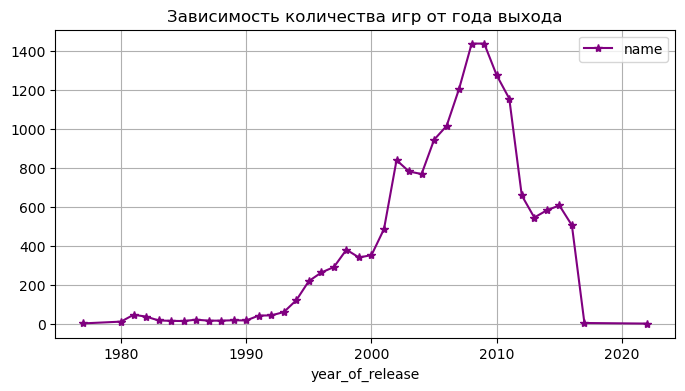

In [28]:
data.pivot_table(index = 'year_of_release', 
                 values = 'name', aggfunc = 'count').plot(style = '-*', color = 'purple', title = 'Зависимость количества игр от года выхода', grid = True, figsize = (8,4))

**Вывод**: как видим, до 1995 года выходило довольно мало игр, после произошел резкий скачок в индустрии и количество игр в год стремительно росло вплоть до 2009-2010, далее динамика пошла на спад. Ближе к 2016 году примерно на уровне 2000-х, возможно это связано с тем, что игры стали технически сложнеее, "навороченнее". Получается "редко, но метко". 

Поскольку игр до 1995 довольно мало, можно исключить их из рассмотрения.

#### Динамика продаж по платформам

<AxesSubplot:title={'center':'Продажи платформ по регионам'}, xlabel='platform'>

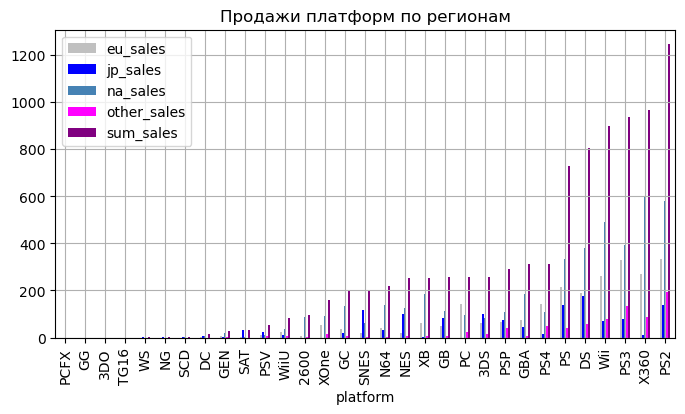

In [29]:
dinamic_sales_pl = data.pivot_table(
    index = 'platform', values = ['na_sales', 'eu_sales', 'jp_sales', 
                                  'other_sales','sum_sales'], aggfunc = 'sum').sort_values(by = 'sum_sales')
dinamic_sales_pl.plot(kind = 'bar', color = 
                      ['silver','blue', 'steelblue','magenta','purple'],grid = True,
                      figsize = (8,4), title = 'Продажи платформ по регионам')

**Вывод**: как видим, в суммарных продажах за все время лидируют такие платформы: PS, DS, Wii, PS3, X360, PS2. Построим для них распределение по годам и исследуем, за какой характерный срок появляются новые и исчезают старые платформы. Для этого показательным кажется график heatmap.

#### Распределение продаж платформ по годам

Из распределения видно, что в среднем топовые платформы востребовательны в течение 10 лет, причем у всех довольно предсказуемый жизненный цикл: сначала активный рост, пик, а потом спад 

На примере Sony и их PS, PS2,PS3 видно, что как только наступает середина жизни одной платформы и продажи начинают падать, то на рынок выпускают следующую модель. 

Хочу обратить внимание на неожиданные значения для PS2,PS3 в 80-х. Понятно, что в то время приставки еще не существовали. Скорее всего причиной такой аномалии послужило заполнение пропусков года релиза, на сайте ag.ru указана дата в целом, а не для какой-то конкретной платформы, поэтому игра действительно могла выйти в 80-е, но для ps ее сделали позже. Удалим строки с такой аномалией, чтоб не смущали.

Еще, конечно, настораживает платформа DS со значением в 1985, проверила, оказалось, что она выпущена в 2004 году. Тоже удалим эту строку.

<AxesSubplot:xlabel='year_of_release', ylabel='platform'>

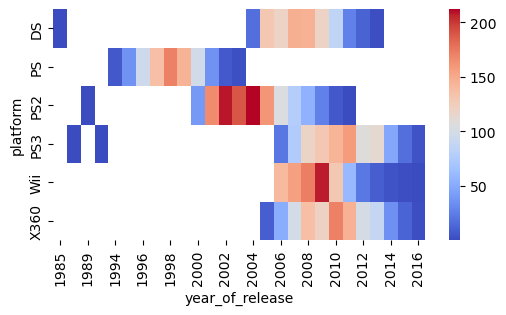

In [30]:
lider_platform = data.query('platform in ["PS", "DS", "Wii", "PS3", "X360", "PS2"]')
distrib_platform = lider_platform.pivot_table(index = 'platform', 
                                              columns = 'year_of_release', values = 'sum_sales',aggfunc = 'sum')
plt.figure(figsize=(6,3))
sns.heatmap(distrib_platform,cmap= 'coolwarm')

In [31]:
data.query('platform in ["PS2", "PS3","DS"] and year_of_release < 2000')

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating,sum_sales
4127,sonic-the-hedgehog,PS3,1991,Platform,0.00,0.48,0.00,0.00,43.0,4.1,E10+,0.48
8364,sword-of-the-samurai,PS2,1989,Fighting,0.00,0.00,0.17,0.00,NaN,NaN,-1,0.17
8500,splatterhouse,PS3,1988,Action,0.13,0.02,0.00,0.02,59.0,7.7,M,0.17
15957,strongest-tokyo-university-shogi-ds,DS,1985,Action,0.00,0.00,0.02,0.00,NaN,NaN,-1,0.02


Удаляем строки с аномалиями.

In [32]:
data = data.drop(index = [4127,8364,8500,15957]).reset_index(drop = True)

<AxesSubplot:xlabel='year_of_release', ylabel='platform'>

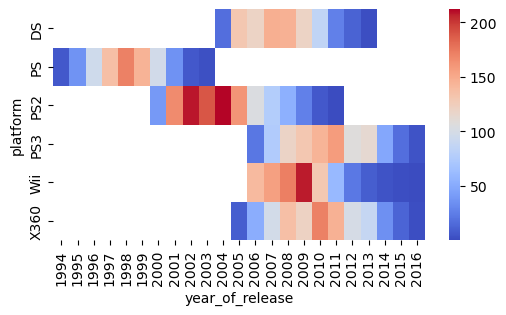

In [33]:
lider_platform = data.query('platform in ["PS", "DS", "Wii", "PS3", "X360", "PS2"]')
distrib_platform = lider_platform.pivot_table(index = 'platform', 
                                              columns = 'year_of_release', values = 'sum_sales',aggfunc = 'sum')
plt.figure(figsize=(6,3))
sns.heatmap(distrib_platform,cmap= 'coolwarm')

Теперь все хорошо=)

#### Актуальный период

Теперь перейдем к определению актуального периода исследования. Для этого построим "жизненный цикл" для каждой платформы, чтобы определить наиболее популярные к 2016 году приставки, а также те, которые уже заканчивают свое существование в игровой индустрии.  

<AxesSubplot:xlabel='year_of_release'>

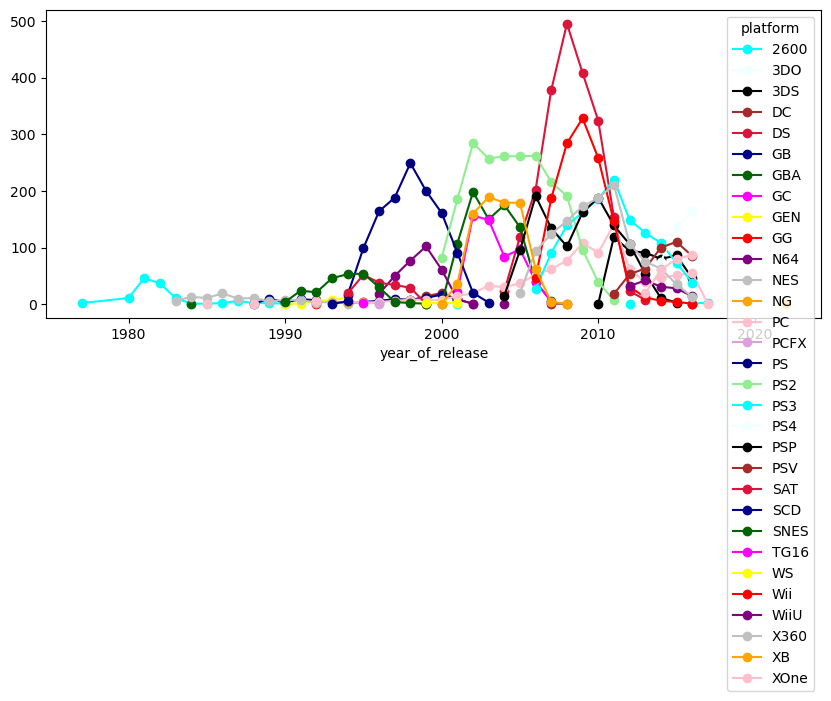

In [34]:
cycle_platform = data.pivot_table(index = 'year_of_release', columns = 'platform', values = 'name', aggfunc = 'count')
colors = ['aqua', 'azure', 'black', 'brown', 'crimson', 'darkblue', 'darkgreen', 'magenta', 'yellow', 'red', 'purple','silver', 'orange','pink','plum', 'navy', 'lightgreen']
cycle_platform.plot(style = '-o', color = colors, figsize = (10,4))

**Вывод**: к 2016 году набирают обороты PS4, XOne. Год релиза первой игры на них примерно одинаковый - 2013. С учётом стремительго развития индустрии имеет смысл взять актуальный период 2015-2016 для исследования.

#### "Лидеры, растущие и падающие"

Определим, какие платформы лидируют по продажам, какие только растут или уже падают, а также выберем несколько потенциально прибыльных платформ в выбранный актуальный период.

<AxesSubplot:title={'center':'Продажи платформ по регионам и общие в 2015-2016 г.'}, xlabel='platform'>

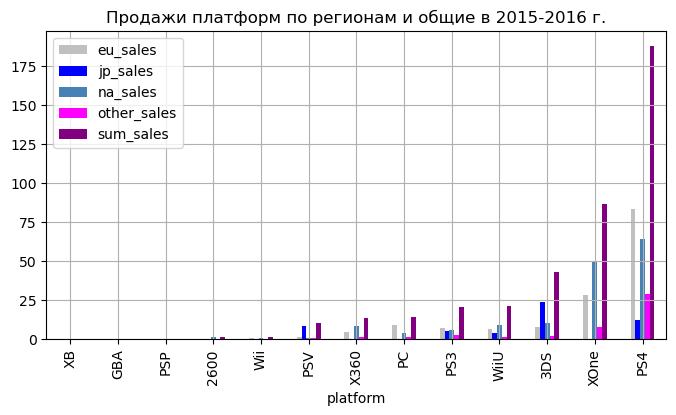

In [35]:
data_new = data.query('year_of_release >= 2015')
data_new.pivot_table(
    index = 'platform', values = ['na_sales', 'eu_sales', 'jp_sales', 
                                  'other_sales','sum_sales'], aggfunc = 'sum').sort_values(by = 'sum_sales').plot(kind = 'bar', color = 
                      ['silver','blue', 'steelblue','magenta','purple'],grid = True,
                      figsize = (8,4), title = 'Продажи платформ по регионам и общие в 2015-2016 г.')

**Вывод**: вновь подтвердилась популярность PS4, на втором месте XOne. У 3DS, PS3, X360 продажи начали падать. К 2016 году PS3 почти исчерпала себя, на смену пришла PS4, похожая ситуация и с X360 и XOne, первая уступает место второй. Выделяем следующие актуальные платформы:

In [36]:
lider_platform = ['PS4', 'XOne', '3DS','WiiU']

<div class="alert alert-info">
<b>Sony полностью прекратила производство PS3 17 марта 2017, а Xbox перестал выпускаться и поддерживаться 24 апреля 2016, поэтому исключаю из рассмотрения.</b> 
</div>

#### Диаграмма размаха глобальных продаж платформ

Построим график «ящик с усами» по глобальным продажам игр в разбивке по платформам. Будем исследовать актуальный период и востребованные платформы.

(0.0, 2.5)

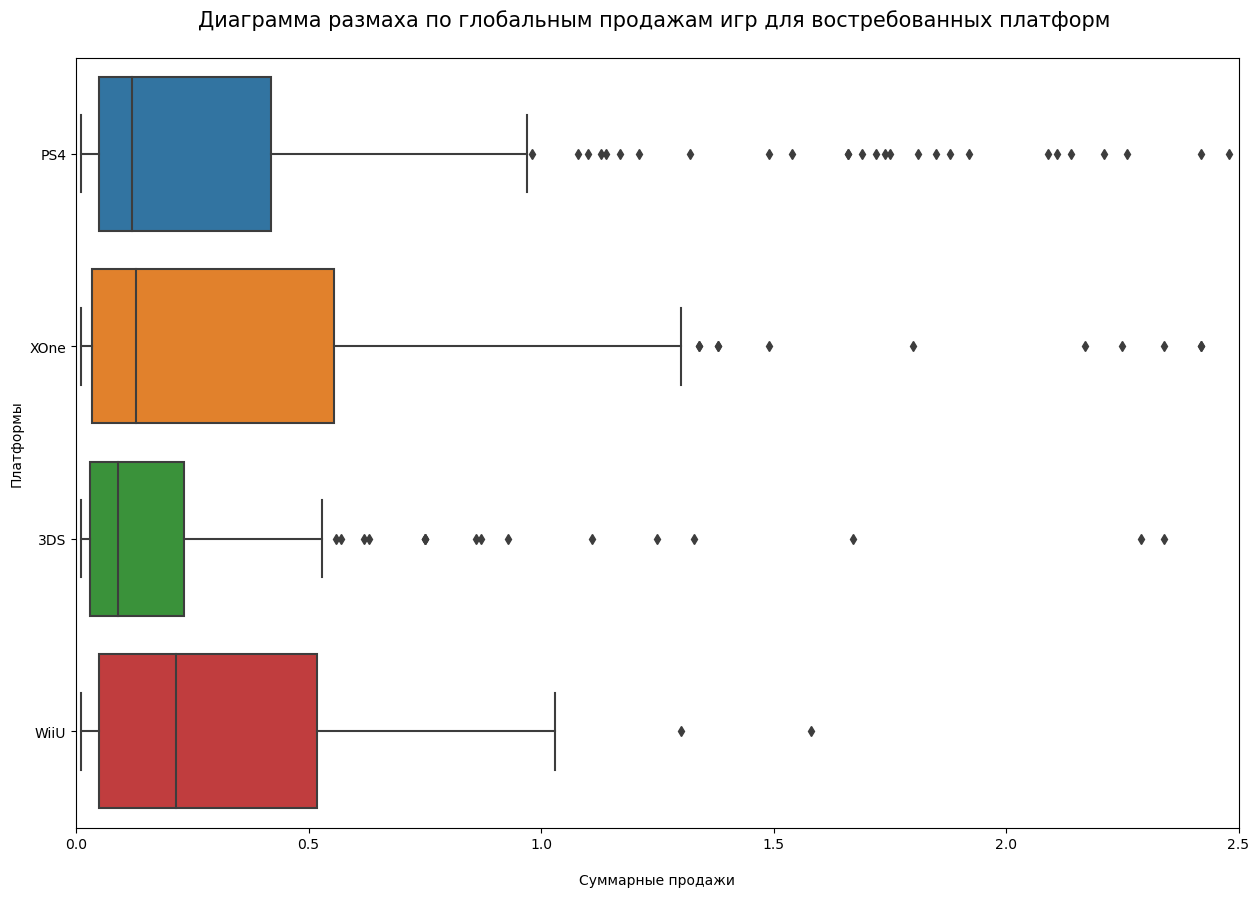

In [37]:
data_new = data_new.query('platform in @lider_platform')
plt.figure(figsize=(15,10))
sns.boxplot(data=data_new, x='sum_sales', y='platform')
plt.title(label='Диаграмма размаха по глобальным продажам игр для востребованных платформ \n', fontsize=15)
plt.xlabel("\nСуммарные продажи", fontsize=10)
plt.ylabel("Платформы", fontsize=10)
plt.xlim(0, 2.5)

In [39]:
des_act_plat = pd.DataFrame({'name':lider_platform, 
'count' :[301.0,167.0,132.0,42.0], 'mean': [0.63,0.52,0.33,0.5], 
'std': [1.46,0.97,0.8,0.85], 'min': [0.01,0.01,0.01,0.01],'25%': [0.05,0.04,0.03,0.05],
'50%':[0.12,0.13,0.09,0.21], '75%':[0.42 ,0.56,0.23,0.52],'max':[14.63,7.39,7.14,4.44]})
des_act_plat

,name,count,mean,std,min,25%,50%,75%,max
0,PS4,301.0,0.63,1.46,0.01,0.05,0.12,0.42,14.63
1,XOne,167.0,0.52,0.97,0.01,0.04,0.13,0.56,7.39
2,3DS,132.0,0.33,0.80,0.01,0.03,0.09,0.23,7.14
3,WiiU,42.0,0.50,0.85,0.01,0.05,0.21,0.52,4.44


**Вывод**: наблюдаем следующую картину. Примерно одинаковые медианы у PS4, XOne. Среднее у всех платформ больше медианы. Это значит, что распределение будет положительно ассиметричным (горб будет слева).
Максимальное из максимальных имеет PS4 - 14,63, в пиковых продажах она обходит XOne почти в три раза. 

#### Влияние отзывов на продажи одной популярной платформы

Исследуем, как влияют на продажи внутри одной популярной платформы отзывы пользователей и критиков, построим диаграмму рассеяния для каждой популярной платформы и вычислим корреляцию между отзывами и продажами. 

**PS4**

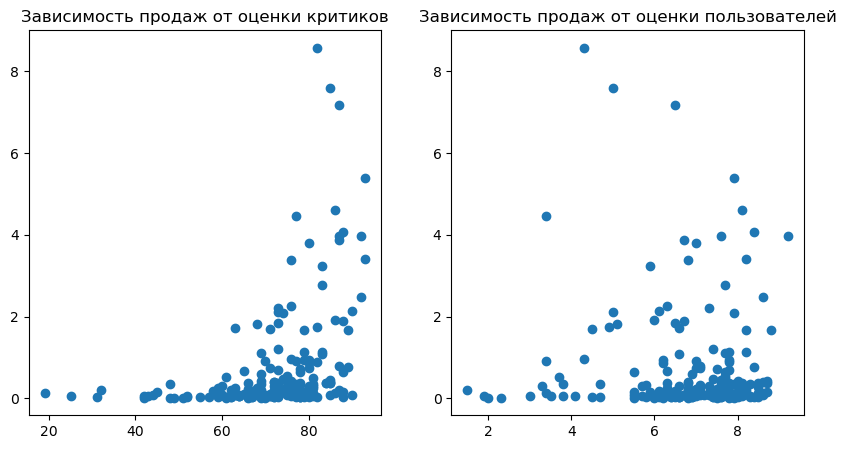

In [40]:
fig,ax = plt.subplots(nrows = 1, ncols = 2, figsize=(10,5))
ps4 = data_new.query('platform == "PS4"')[['user_score','critic_score','sum_sales']].sort_values(by = 'sum_sales')
ax[0].set_title('Зависимость продаж от оценки критиков')
ax[0].scatter(ps4['critic_score'],ps4['sum_sales'])

ax[1].set_title('Зависимость продаж от оценки пользователей')
ax[1].scatter(ps4['user_score'],ps4['sum_sales'])

**XOne**

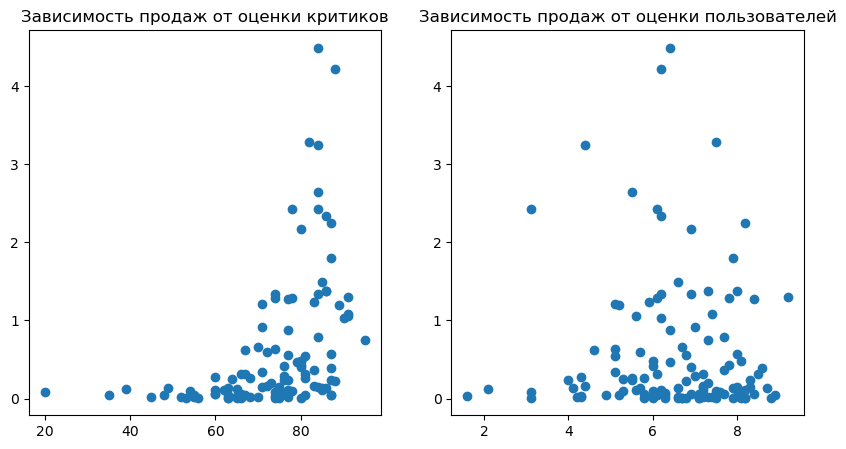

In [41]:
fig,ax = plt.subplots(nrows = 1, ncols = 2, figsize=(10,5))
xone = data_new.query('platform == "XOne"')[['user_score','critic_score','sum_sales']].sort_values(by = 'sum_sales')
ax[0].set_title('Зависимость продаж от оценки критиков')
ax[0].scatter(xone['critic_score'],xone['sum_sales'])

ax[1].set_title('Зависимость продаж от оценки пользователей')
ax[1].scatter(xone['user_score'],xone['sum_sales'])

**3DS**

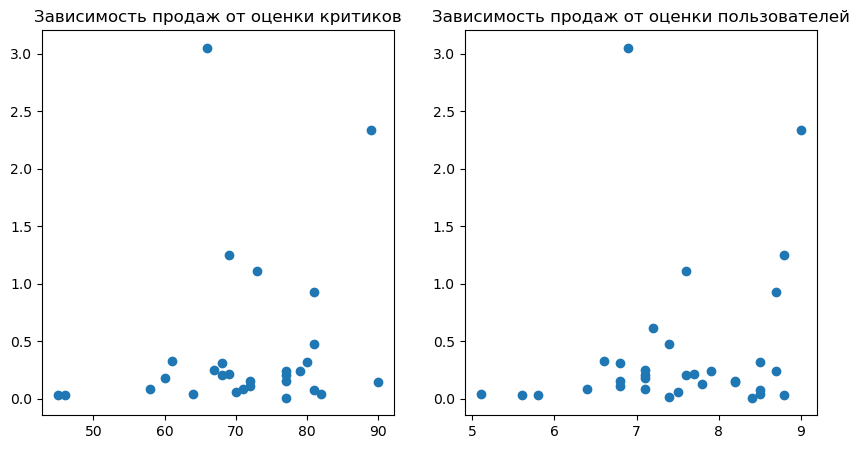

In [42]:
fig,ax = plt.subplots(nrows = 1, ncols = 2, figsize=(10,5))
ds = data_new.query('platform == "3DS"')[['user_score','critic_score','sum_sales']].sort_values(by = 'sum_sales')
ax[0].set_title('Зависимость продаж от оценки критиков')
ax[0].scatter(ds['critic_score'],ds['sum_sales'])

ax[1].set_title('Зависимость продаж от оценки пользователей')
ax[1].scatter(ds['user_score'],ds['sum_sales'])

**WiiU**

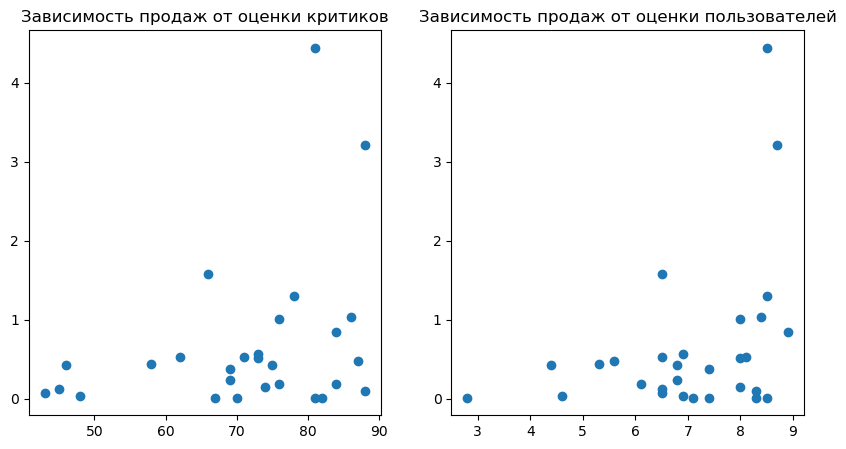

In [43]:
fig,ax = plt.subplots(nrows = 1, ncols = 2, figsize=(10,5))
wii = data_new.query('platform == "WiiU"')[['user_score','critic_score','sum_sales']].sort_values(by = 'sum_sales')
ax[0].set_title('Зависимость продаж от оценки критиков')
ax[0].scatter(wii['critic_score'],wii['sum_sales'])

ax[1].set_title('Зависимость продаж от оценки пользователей')
ax[1].scatter(wii['user_score'],wii['sum_sales'])

Пока по графикам нельзя сказать о какой-то сильной линейной зависимости между продажами и отзывами критиков/пользователей. Удостоверимся в этом с помощью вычисления коэффициента корреляции Пирсона.

Соотнесем выводы с продажами игр на других платформах. 

In [45]:
corr_sales_score = pd.DataFrame({'name':lider_platform, 
'critic_sore' :[0.39, 0.43, 0.18, 0.32], 'user_score': [-0.06,-0.04,0.2,0.36]})
corr_sales_score

,name,critic_sore,user_score
0,PS4,0.39,-0.06
1,XOne,0.43,-0.04
2,3DS,0.18,0.20
3,WiiU,0.32,0.36


**Вывод**: как видим по графикам и по коэффициентам корреляции, о какой-либо линейной зависимости между продажами и отзывами критиков/пользователей говорить нельзя. В случае пары `user_score` - `sum_sales` у PS4, XOne коэффициент корреляции совсем близко к 0, у 3DS чуть лучше, но всё равно маленький. В случае `critic_score` - `sum_sales` ситуация чуть лучше, но коэффициенты всё равно слишком малы для сильной/средней зависимости.

<div class="alert alert-info">
<b>Построила диаграммы рассеяния для каждой популярной платформы, а также таблицу с коэффициентами корреляции.</b> 
</div>

#### Общее распределение игр по жанрам

Исследуем общее распределение игр по жанрам, а также самые прибыльные жанры.

,name
genre,
Puzzle,6
Strategy,10
Simulation,15
Platform,22
Fighting,25
Racing,29
Adventure,43
Misc,47
Sports,57


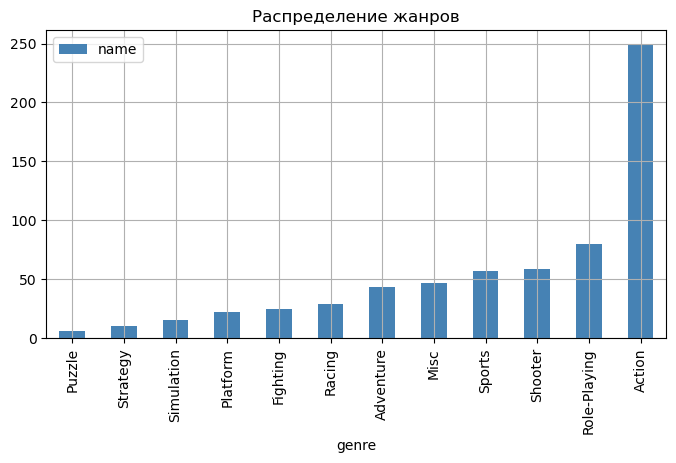

In [46]:
des_genres = data_new.pivot_table(
    index = 'genre', values = 'name', aggfunc = 'count').sort_values(by = 'name')
des_genres.plot(kind = 'bar', color = 'steelblue',grid = True, figsize = (8,4), title = 'Распределение жанров')
des_genres

Больше всего выпускают игры в жанре "Action" - 249 млн. экземпляров за актуальный период, далее идет "Role-Playing" - 80, "Shooter" на третьем месте - 59. Самым низкопроизводимым жанром оказались "Puzzle" - 6, "Strategy" - 10.  

Исследуем продажи по жанрам.

,sum_sales
genre,
Puzzle,0.71
Strategy,0.92
Simulation,5.02
Adventure,8.08
Platform,8.88
Racing,10.37
Misc,10.96
Fighting,11.18
Role-Playing,48.97


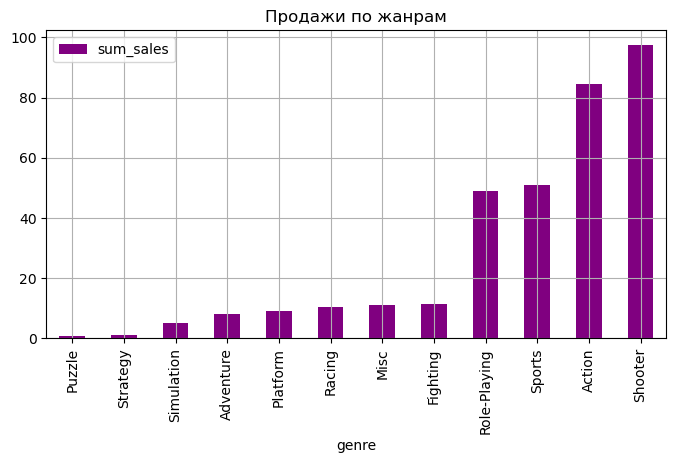

In [47]:
genre_sales = data_new.pivot_table(index = 'genre', values = 'sum_sales', aggfunc = 'sum').sort_values(by = 'sum_sales')
genre_sales.plot(kind = 'bar', color = 'purple',grid = True, figsize = (8,4),title = 'Продажи по жанрам')
genre_sales

Больше всего и покупают шутер, однако на втором месте уже экшн, а вот рол-плей на четвертом! Интересно посмотреть на средние продажи игры определенного жанра, то есть отношение купленных к произведенным. 

Интересно это потому, что жанр экшн делают много, покупают много, жанр шутер на первом месте по покупке, но на 2м месте по количеству. Может быть на самом деле игра жанра шутер покупается лучше, а у экшн такие показатели в продажах просто потому, что его много производят. Проверим.

,sum_sales
genre,
Strategy,0.092000
Puzzle,0.118333
Adventure,0.187907
Misc,0.233191
Simulation,0.334667
Action,0.339759
Racing,0.357586
Platform,0.403636
Fighting,0.447200


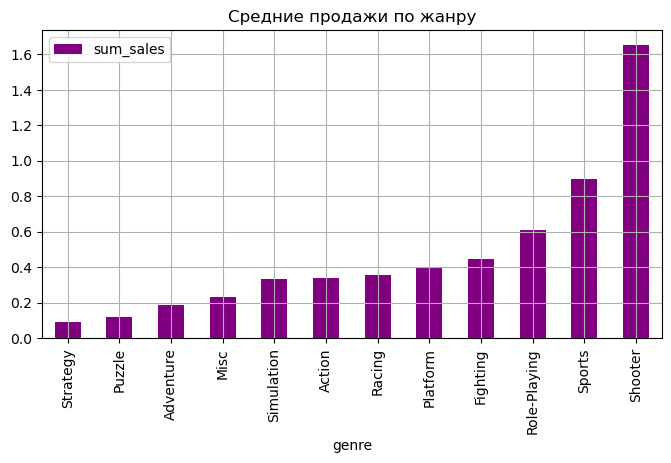

In [48]:
genre_sales_mean = data_new.pivot_table(index = 'genre', values = 'sum_sales', aggfunc = 'mean').sort_values(by ='sum_sales')
genre_sales_mean.plot(kind = 'bar', color = 'purple',grid = True, figsize = (8,4),title = 'Средние продажи по жанру')
genre_sales_mean

**Вывод**: как оказалось, интерес обоснован. Одна игра жанра шутер покупается в среднем в 1.6 млн. экземплярах, в то же время одна игра жанра экшн в среднем покупается в 0.34 экземплярах. Соответсвенно, чем больше игр по 1.6 миллинонов будет произведено, тем больше выручка, поэтому шутер лидирует в продажах. Но хоть шутеры и меньше производят, зато геймеры их любят и покупают, как оказалось, в больших количествах. 

### Составление портрета пользователя каждого региона

В нашем распоряжении три вида регионов: NA, EU, JP - Северная Америка, Европа и Япония.

#### Доли продаж популярных платформ для каждого региона

In [49]:
data_new.pivot_table(index = 'platform',values='na_sales',aggfunc = 'sum').sort_values(by = 'na_sales',ascending = False)

,na_sales
platform,
PS4,63.86
XOne,50.30
3DS,10.31
WiiU,8.86


In [50]:
data_new.pivot_table(index = 'platform',values='eu_sales',aggfunc = 'sum').sort_values(by = 'eu_sales',ascending = False)

,eu_sales
platform,
PS4,83.54
XOne,28.10
3DS,7.39
WiiU,6.49


In [51]:
data_new.pivot_table(index = 'platform',values='jp_sales',aggfunc = 'sum').sort_values(by = 'jp_sales',ascending = False)

,jp_sales
platform,
3DS,23.55
PS4,12.05
WiiU,4.12
XOne,0.18


Text(0.5, 1.0, 'Тепловая карта продаж в регионах')

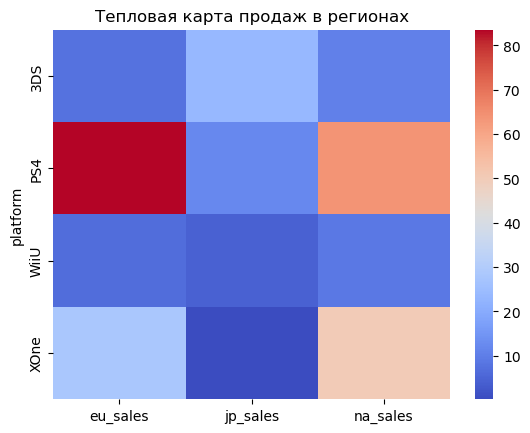

In [52]:
region_group = data_new.pivot_table(index = 'platform',values=['na_sales','eu_sales','jp_sales'],aggfunc = 'sum')
sns.heatmap(region_group, cmap='coolwarm')
plt.title('Тепловая карта продаж в регионах')

**Вывод**: в Северной Америке лидирует по продажам PS4, после этого XOne, 3DS, самая непопулярная платформа - это WiiU. Европейские пользователи очень похожи в предпочтениях, рейтинг совпал.

Очень интересны в своих предпочтениях японские пользователи. Совсем всё наоборот! Самой популярной платформой стала 3DS, далее идет PS4. А вот XOne совсем не пользуется популярностью. 

Если о числах относительно всех регионов, то 
- PS4 больше всего продались в Европе(83 млн. копий) за актуальный период
- XOne в Северной Америке(50 млн.копий)
- 3DS в Японии(24 млн.копий)
- WiiU в Северной Америке (8,86 млн.копий)

#### Самые популярные жанры в регионах

In [53]:
data_new.pivot_table(index = 'genre',values='na_sales',aggfunc = 'sum').sort_values(by = 'na_sales',ascending = False)

,na_sales
genre,
Shooter,44.70
Action,29.16
Sports,20.72
Role-Playing,18.69
Fighting,5.16
Misc,4.41
Platform,3.62
Racing,2.82
Adventure,2.72


In [54]:
data_new.pivot_table(index = 'genre',values='eu_sales',aggfunc = 'sum').sort_values(by = 'eu_sales',ascending = False)

,eu_sales
genre,
Shooter,36.63
Action,29.53
Sports,22.40
Role-Playing,15.43
Racing,6.14
Adventure,3.46
Fighting,3.40
Misc,3.25
Platform,3.03


In [55]:
data_new.pivot_table(index = 'genre',values='jp_sales',aggfunc = 'sum').sort_values(by = 'jp_sales',ascending = False)

,jp_sales
genre,
Action,16.70
Role-Playing,9.82
Shooter,3.63
Misc,2.42
Simulation,1.89
Platform,1.39
Fighting,1.15
Sports,0.97
Adventure,0.95


Text(0.5, 1.0, 'Тепловая карта жанров в регионах')

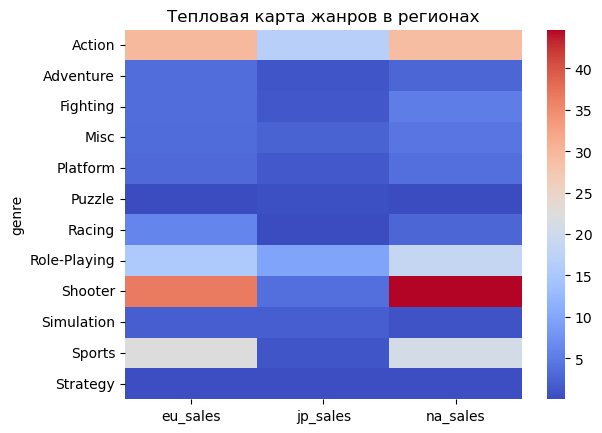

In [56]:
region_genre = data_new.pivot_table(index = 'genre',values=['na_sales','eu_sales','jp_sales'],aggfunc = 'sum')
sns.heatmap(region_genre, cmap='coolwarm')
plt.title('Тепловая карта жанров в регионах')

**Вывод**: итак, если посмотрим на сводные таблицы и на тепловую карту. Очень похожи картины у Европы и Америки. На первом месте жанр шутер, но по количеству продаж лидирует Америка: 45 млн. против 37 млн.. Далее и там,и там идет шутер, в продажах очень близко - (29.16(NA) и 29.53(EU) млн. копий). После идет жанр спорт и рол-плэй. Совсем не популярны головоломки, стратегии и симуляции.

В Японии вкусы отличаются по местам. Наиболее популярным стал экшн (16.7 млн.копий) и рол плэй(почти 10 млн.копий). Не популярны здесь гонки, стратегии и головоломки. Однако по сравнению с Америкой и Европой, симуляции здесь в середине рейтинга.

#### Влияние рейтинга ESRB на продажи в отдельном регионе

In [57]:
data_new[~data_new['rating'].isnull()].pivot_table(index = 'rating',values='na_sales',aggfunc = 'sum').sort_values(by = 'na_sales',ascending = False)

,na_sales
rating,
M,43.64
-1,33.19
E,21.55
T,19.84
E10+,15.11


In [58]:
data_new[~data_new['rating'].isnull()].pivot_table(index = 'rating',values='eu_sales',aggfunc = 'sum').sort_values(by = 'eu_sales',ascending = False)

,eu_sales
rating,
M,40.99
-1,30.53
E,28.51
T,17.11
E10+,8.38


In [59]:
data_new[~data_new['rating'].isnull()].pivot_table(index = 'rating',values='jp_sales',aggfunc = 'sum').sort_values(by = 'jp_sales',ascending = False)

,jp_sales
rating,
-1,24.00
E,4.93
T,4.47
M,3.52
E10+,2.98


Text(0.5, 1.0, 'Тепловая карта рейтингов в регионах')

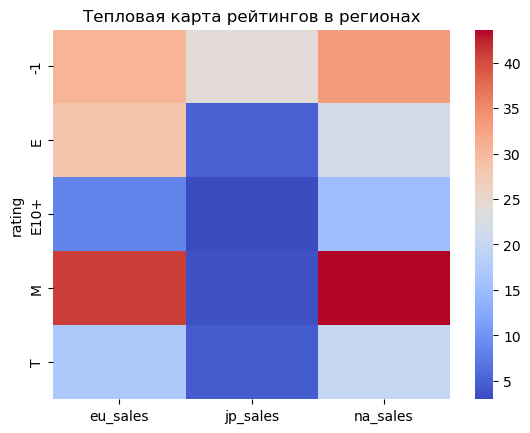

In [60]:
region_rat = data_new.pivot_table(index = 'rating',values=['na_sales','eu_sales','jp_sales'],aggfunc = 'sum')
sns.heatmap(region_rat, cmap='coolwarm')
plt.title('Тепловая карта рейтингов в регионах')

**Вывод**: в Европе и в Америке самыми продаваемыми являются игры с рейтингом "М" - для взрослых. Вспомним, что там самые популярные жанры экшн и шутер, всё сходится. Обычно такие игры с элементами "для взрослых": перестрелки, кровь и тд. В Японии же самым популярными стали игры рейтинга "E" - для всех. Однако если мы посмотрим по количеству в последней сводной таблице, то там оцененных млн.копий в разы меньше, чем у Америки и Европы. Возможно, это связано с тем, что в Японии своя "оценочная" организация. Это действительно так, возрастными рейтингами игр в Японии занимается CERO. 

**Вывод по разделу**: итак, портреты пользователей по регионам выглядят следующим образом
> Пользователь из Северной Америки скорее всего выберет PS4, XOne и будет играть в игры жанра экшн и шутер с рейтингом M. 

> Пользователь из Европы аналогично американцу выберет платформы PS4, XOne. Предпочитает жанры экшн и шутер с рейтингом M.

> Пользователь из Японии сильно выделяется на фоне других. Он выберет платформу 3DS и будет играть на ней в экшн или рол плэй. Рейтинг игр будет либо E, либо оценен другой компанией. 

### Статистический анализ

#### Сравнение средних пользовательских рейтингов XOne и PC

Сформируем следующий статистический критерий:
$$\delta =\begin{cases}
   H_0, a_1=a_2\\
   H_1, a_1 \neq a_2
 \end{cases}$$ где $a_1, a_2$ средние пользовательских оценок для XOne, PC.

$H_0$: средние пользовательских оценок платформ XOne и PC **равны**.

$H_1$: средние пользовательских оценок платформ XOne и PC **не равны**.

Возьмем данные за актуальный период и с соответствующими платформами.

In [61]:
data_xone = data.query('platform == "XOne" and year_of_release >=2015')
data_pc = data.query('platform == "PC" and year_of_release >=2015')

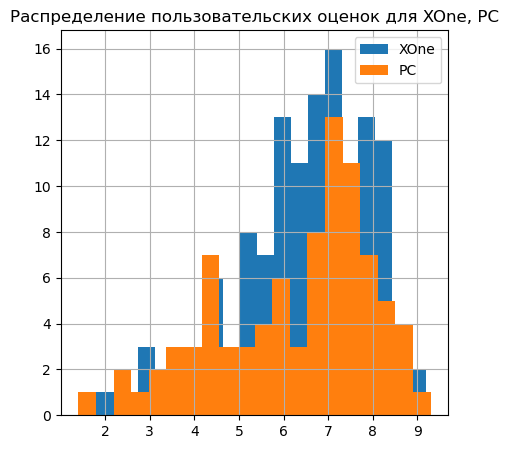

In [62]:
fig,ax = plt.subplots(nrows =1, ncols = 1, figsize =(5,5))
ax.hist(data_xone['user_score'],bins=20)
ax.hist(data_pc['user_score'],bins=20)
ax.set_title('Распределение пользовательских оценок для XOne, PC')
ax.legend(['XOne','PC'])
ax.grid()

In [63]:
data_xone['user_score'].describe()

count    121.000000
mean       6.542149
std        1.458010
min        1.600000
25%        5.800000
50%        6.700000
75%        7.700000
max        9.200000
Name: user_score, dtype: float64

In [64]:
data_pc['user_score'].describe()

count    87.000000
mean      6.295402
std       1.766346
min       1.400000
25%       4.950000
50%       6.900000
75%       7.600000
max       9.300000
Name: user_score, dtype: float64

Итак, среднее для XOne составляет 6.54, а для PC 6.29. Среднеквадратичное отклонение соответсвенно 1.46 и 1.77.

In [65]:
alpha = .05
results = st.ttest_ind(data_xone.loc[~data_xone['user_score'].isnull(),'user_score'],
                       data_pc.loc[~data_pc['user_score'].isnull(),'user_score'], equal_var=False)
print('Значение p-value:', results.pvalue)
if results.pvalue<alpha:
    print('Отвергаем нулевую гипотезу')
else:
    print('Не удалось отвергнуть нулевую гипотезу')

Значение p-value: 0.2873378302816034
Не удалось отвергнуть нулевую гипотезу


**Вывод**: для проверки гипотезы использовался Т-тест Уэлча и функция ttest_ind. По итогу нулевую гипотезу отвергнуть не удалось, это значит, мы допускаем, что средние пользовательских оценок XOne и PC могут совпадать.

#### Сравнение средних пользовательских рейтингов жанров Action и Sports

Сформируем следующий статистический критерий:
$$\delta =\begin{cases}
   H_0, a_1=a_2\\
   H_1, a_1 \neq a_2
 \end{cases}$$ где $a_1, a_2$ средние пользовательских оценок для жанров Action, Sports.
 
$H_0$: средние пользовательских оценок игр жанров Action и Sports **равны**.

$H_1$: средние пользовательских оценок игр жанров Action и Sports **не равны**.

Возьмем данные за актуальный период.

In [66]:
data_action = data.query('genre == "Action" and year_of_release >=2015')
data_sports = data.query('genre == "Sports" and year_of_release >=2015')

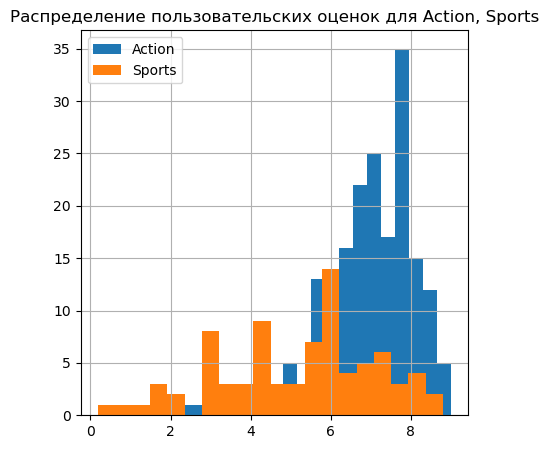

In [67]:
fig,ax = plt.subplots(nrows =1, ncols = 1, figsize =(5,5))
ax.hist(data_action['user_score'],bins=20)
ax.hist(data_sports['user_score'],bins=20)
ax.set_title('Распределение пользовательских оценок для Action, Sports')
ax.legend(['Action','Sports'])
ax.grid()

In [68]:
data_action['user_score'].describe()

count    193.000000
mean       6.808290
std        1.346498
min        2.000000
25%        6.300000
50%        7.100000
75%        7.700000
max        9.000000
Name: user_score, dtype: float64

In [69]:
data_sports['user_score'].describe()

count    82.000000
mean      5.198780
std       1.967859
min       0.200000
25%       3.850000
50%       5.550000
75%       6.600000
max       8.800000
Name: user_score, dtype: float64

In [70]:
alpha = .05
results = st.ttest_ind(
    data_action.loc[~data_action['user_score'].isnull(),'user_score'], 
    data_sports.loc[~data_sports['user_score'].isnull(),'user_score'], equal_var=False)
print('Значение p-value:', results.pvalue)
if results.pvalue<alpha:
    print('Отвергаем нулевую гипотезу')
else:
    print('Не удалось отвергнуть нулевую гипотезу')

Значение p-value: 5.97163549920592e-10
Отвергаем нулевую гипотезу


**Вывод**: для проверки гипотезы использовался Т-тест Уэлча и функция ttest_ind. По итогу отвергаем нулевую гипотезу, это значит, что средние пользовательских оценок Action и Sports не совпадают, что подтверждает метод `describe()` выше.

### Общий вывод

Подведем итоги. Проведен анализ закономерностей, определяющих успешность игры. На этапе предобработки данных были обработаны пропуски в соответствии с выбранным принципом, заменены типы данных. 

Пик игровой индустрии пришёлся на 2008-2010 годы, ближе к 2016 году наблюдалась отрицательная динамика. За всё время в суммарных продажах лидируют такие платформы: PS, DS, Wii, PS3, X360, PS2. 

Выяснилось, что в среднем платформа живет 10 лет, к середине жизни наблюдается пик продаж, а также выход следующей модели платформы.  

Для прогноза на 2017 год требовалось определить актуальный период. К 2016 году набирают обороты PS4, XOne. Поскольку игровая индустрия стремительно развивается, то было принято решение взять за актуальный период 2015-2016 года.

Также были выявлен топ-платформ. Такими стали PS4, 3DS, XOne, WiiU, 3DS.

Было исследовано, как влияют на продажи отзывы пользователей и критиков. Выяснилось, что какой-либо линейной зависимости между продажами и отзывами критиков/пользователей нет. 

В производстве игр по жанрам лидируют экшн и рол плэй, в продажах экшн и шутер. Однако по среднему количеству проданных экземпляров одной игры конкретного жанра лидирует шутер. 

В процессе исследования были построены портреты пользователей из Северной Америки, Европы и Японии. Как оказалось, предпочтения различаются. Пользователь из Северной Америки или Европы скорее всего выберет PS4, XOne и будет играть в игры жанра экшн и шутер с рейтингом M. А вот пользователь из Японии сильно выделяется на фоне других. Он выберет платформу 3DS и будет играть на ней в экшн или рол плэй рейтинга Е. Сложилось впечатление, что японские игроки игнорируют зарубежные платформы.

Был проведен статистический анализ данных.

Первый вопрос: равняются ли средние пользовательских рейтингов XOne и PC? Сформулировав гипотезы и проведя тест Уэлча, я выяснила, что основную гипотезу о равенстве средних отвергнуть нельзя. 

Второй вопрос: равняются ли средние пользовательских рейтингов жанров Action и Sports. Как оказалось, средние не равны, тест показал, что основную гипотезу о равенстве следует отвергнуть. 